# Classes

## Motivação 

Já aprendemos sobre algumas __Criaturas__ que vivem em Python:

- Listas
- Tuplas
- Conjuntos
- Séries
- DataFrames
- Arrays

Como podemos __criar uma criatura nova__?

## Conceitos

* Abstração
* Classe
* Instância
* Métodos
* Atributos

## Vamos criar um Círculo

* __Atributos__ : centro, raio, área, perímetro
* __Módulos__: plot, classifica_ponto

In [1]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

In [2]:
class circulo():
    def __init__(self, centro=(0,0), raio = 1):
        
        self.centro = centro
        self.raio = raio
        self.area = pi * raio ** 2
        self.perimetro = 2 * pi * raio
        pass
    
    def classifica_ponto(self, x, y):
        
        xc, yc, r = self.centro[0], self.centro[1], self.raio
        distancia_quadrado = (x - xc)**2 + (y - yc)**2
        
        
        if distancia_quadrado < r**2:
            return('ponto interno')
        elif distancia_quadrado > r**2:
            return('ponto externo')
        elif distancia_quadrado == r**2:
            return('ponto tangente')
        else:
            return('deu ruim')
    
    def plot(self, n=100, alpha = 100):
        
        from numpy import sin, cos
        xc, yc, r = self.centro[0], self.centro[1], self.raio
        theta = np.linspace(0,2*pi,n)
        
        x = xc + r * cos(theta)
        y = yc + r * sin(theta)
        
        plt.figure(figsize=(6,6))
        plt.plot(x,y)
        plt.scatter(x = xc, y = yc, marker='x', s=100)
        plt.axis('square')
        plt.xlim(xc - r - 1, xc + r + 1)
        plt.ylim(yc - r - 1, yc + r + 1)
        plt.grid('on')
        plt.show()
        pass
        
        

In [3]:
q1 = circulo((1,2), 3)

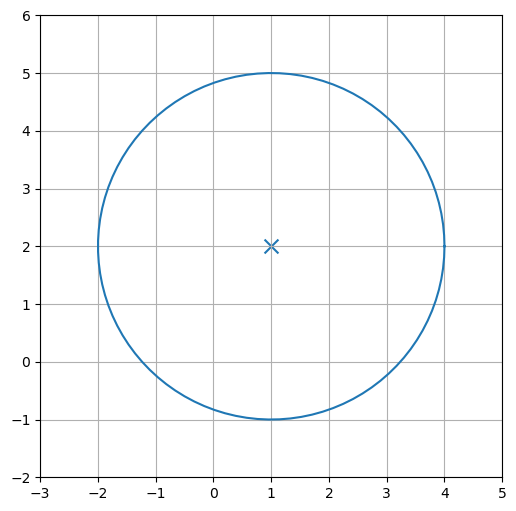

In [4]:
q1.plot()

In [5]:
q1.classifica_ponto(4,5)

'ponto externo'

In [6]:
q1.classifica_ponto(2,3)

'ponto interno'

In [7]:
q1.classifica_ponto(1,-1)

'ponto tangente'

## Exemplos práticos de classes

* Fundos
* Ações
* Seguros
* Filiais  
... e muito mais, a depender do negócio da empresa!

In [8]:
class fundo():
  
  def __init__(self, saldo):

    self.saldo = saldo
    pass
  
  def aplicar(self, quantia):
    self.saldo += quantia
    pass
  
  def resgatar(self, quantia):
    self.saldo -= quantia
    pass
  
  def print_saldo(self):
    print(f'O saldo do fundo é R${self.saldo:.2f}')

In [9]:
Money_Max = fundo(1000)
Money_Max.print_saldo()

O saldo do fundo é R$1000.00


In [10]:
Money_Max.aplicar(5000)
Money_Max.print_saldo()

O saldo do fundo é R$6000.00


In [11]:
Money_Max.resgatar(2000)
Money_Max.print_saldo()

O saldo do fundo é R$4000.00


## Modelos

Exemplo: Regressão Linear Simples

In [12]:
class RLS():
    
    def __init__(self):
        pass
    
    def fit(self, X,y):
        pass
    
    def predict(self, X):
        pass
    
    def score(self, y, yhat):
        #R2 fora da amostra
        pass
    
    def plot(self):
        pass

In [13]:
class RLS():
    
    def __init__(self):
        self.coefs = None
        self.X = None
        self.y = None
        self.r2 = None
    
    def fit(self, X,y):
        
        self.X = X
        self.y = y
        
        covmat = np.cov(X,y)
        coef_angular = covmat[0,1] / covmat[0,0]
        coef_linear = y.mean() - coef_angular * X.mean()
        
        self.coefs = (coef_angular, coef_linear)
        self.r2 = np.corrcoef(X,y)[0,1]**2  
        
        pass
    
    def predict(self, X):
        
        a, b = self.coefs
        yhat = a * X + b
        return(yhat)
    
    def score(self, y, yhat):
        #R2 fora da amostra
        return(np.corrcoef(y,yhat)[0,1]**2)
        
    
    def plot(self):
        
        X, y = self.X, self.y
        
        dominio = np.linspace(min(X), max(X), 1000)
        imagem = self.predict(dominio)
        
        plt.figure(figsize=(20,10))
        plt.scatter(X,y, c='lightgray')
        plt.plot(dominio, imagem, c='red')
        plt.grid('on')
        plt.show()


In [14]:
np.random.seed(0)

In [15]:
n = 1000
X = np.linspace(0,10, n)
y = 2 * X + 1 + np.random.normal(scale=1, size=n)

In [16]:
rl = RLS()
rl.fit(X,y)
print(rl.coefs)
print(rl.r2)

(1.998137835415675, 0.9640541154314306)
0.971607527200776


In [17]:
X_teste = np.random.uniform(0,10, 5)
y_teste = 2 * X_teste + 1 + np.random.normal(scale=1, size=5)
rl.predict(X_teste)

array([17.38682708, 14.96158158, 18.6091617 , 20.27755703, 16.44457932])

In [18]:
rl.score(y_teste, rl.predict(X_teste))

0.9417702709657686

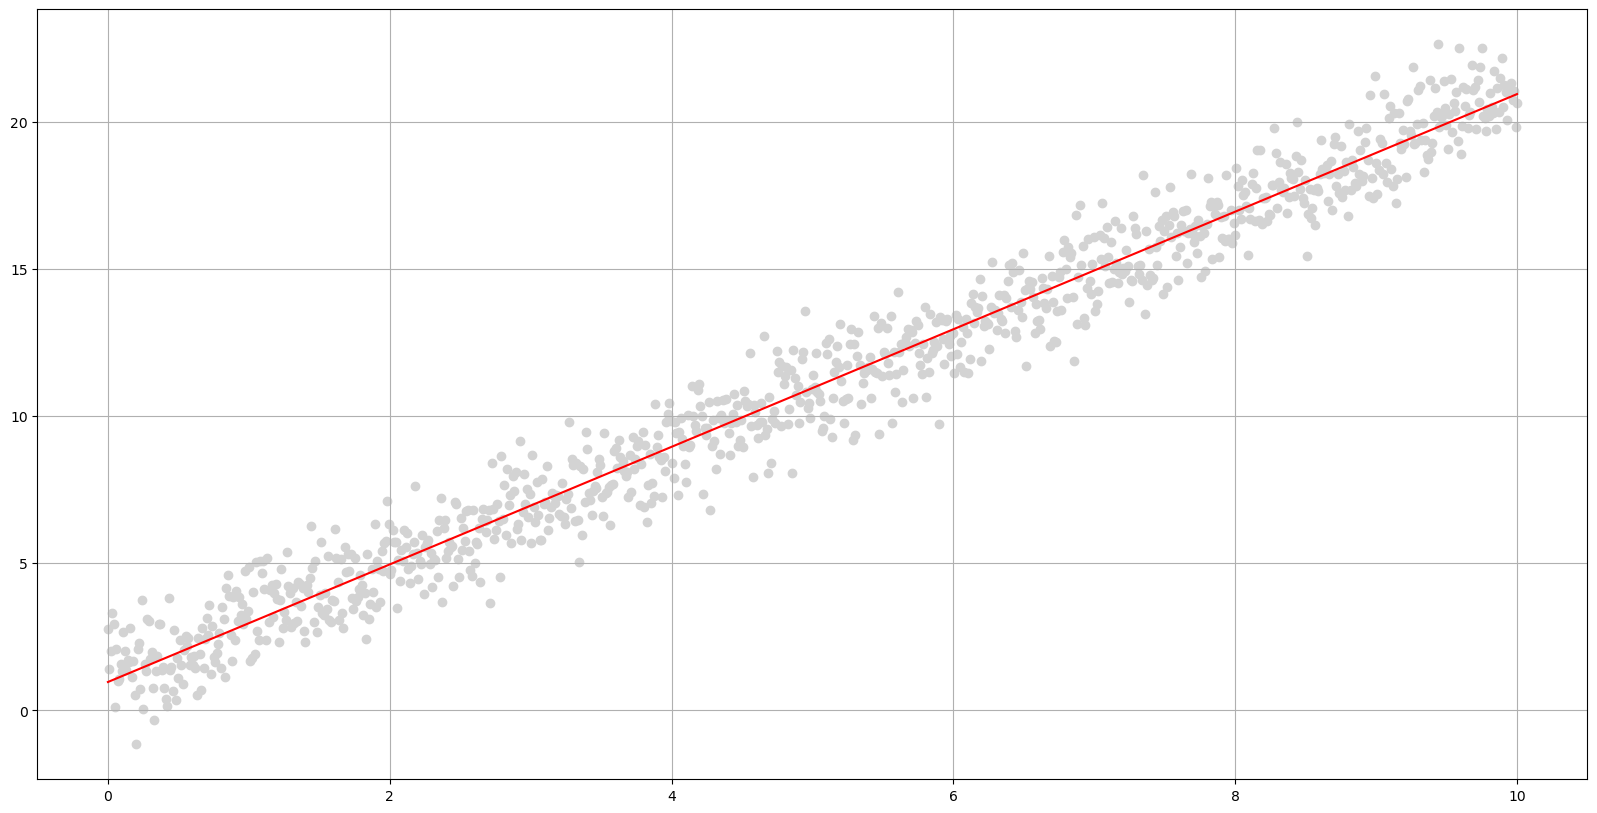

In [19]:
rl.plot()

## Modelos do `scikit-learn`

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
dir(LinearRegression)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'fit',
 'get_params',
 'predict',
 'score',
 'set_params']

In [22]:
X.shape

(1000,)

In [23]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_teste = X_teste.reshape(-1,1)
y_teste = y_teste.reshape(-1,1)

In [24]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(X_teste)

array([[17.38682708],
       [14.96158158],
       [18.6091617 ],
       [20.27755703],
       [16.44457932]])

In [25]:
r2_score(y_teste, lr.predict(X_teste))

0.9127867518510451

## Outros comentários sobre Classes em Python


### Hereditariedade



In [26]:
class Retangulo():
  
  def __init__(self, base, altura):
    self.base = base
    self.altura = altura
    pass
  
  def area(self):
    return(self.base * self.altura)
  
  def perimetro(self):
    return(2*(self.base + self.altura))

In [27]:
R1 = Retangulo(3,2)
R1.area(), R1.perimetro()

(6, 10)

In [28]:
class Quadrado(Retangulo):
  def __init__(self, lado):
    super().__init__(lado, lado)
    pass

In [29]:
Q1 = Quadrado(5)
Q1.area(), Q1.perimetro()

(25, 20)

### Números são classes

In [30]:
#Números são classes
dir(int)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']

### Métodos especiais e operações com classes

In [31]:
class Quadrado(Retangulo):
  def __init__(self, lado):
    super().__init__(lado, lado)
    self.lado = lado
    pass
  
  def __gt__(self, outro_quadrado):

    L1 = self.lado
    L2 = outro_quadrado.lado
    return(L1 > L2)
    

In [32]:
Q1 = Quadrado(5)
Q2 = Quadrado(3)
Q1 > Q2

True

In [33]:
Q1 = Quadrado(15)
Q2 = Quadrado(31)
Q1 > Q2

False

In [54]:
class vetor():
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        pass
    
    def __add__(self, v):
        return(self.x + v.x, self.y + v.y)

    def __mul__(self, v):
        return(self.x * v.x + self.y * v.y)
    
    def __str__(self):
        return(f'({self.x} ; {self.y})')


  

In [55]:
u = vetor(2,-1)
v = vetor(3,5)

In [56]:
u + v

(5, 4)

In [57]:
u * v

1

In [58]:
str(u)

'(2 ; -1)'